# Topic Modeling Explorer

Topic Modeling vom 15.6.2020 mit 30 Topics und allen Artikeln der Amtspresse

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Einleseroutine

In [3]:
df = pd.read_csv( ||| Path to csv-file |||)
df.head()

,docId,filename,filename.1,full_date,year,year_month,article_count,article_counts_per_issue,article_length_chars,article_length_words,...,20 dr regierungs verwaltung,21 kirche katholischen kirchlichen,22 staat gesellschaft großen,23 elsaß armee frankreich,24 kaiser majestät kaiserin,25 regierung entwickelung zeit,26 lehrer schulen schule,27 freisinnigen partei stimmen,28 deutschen kaiser könig,29 regierung frankreich rußland
0,0,1863-07-01_01PC.txt,1863-07-01_01PC.txt,1863-07-01,1863,1863-07,1,9,7101,955,...,0.000083,0.000064,0.000085,0.070336,0.000168,0.010365,0.000076,0.000081,0.032806,0.022728
1,1,1863-07-01_02PC.txt,1863-07-01_02PC.txt,1863-07-01,1863,1863-07,2,9,1083,129,...,0.000519,0.000403,0.000531,0.000424,0.111343,0.017808,0.000479,0.000507,0.205959,0.000892
2,2,1863-07-01_03PC.txt,1863-07-01_03PC.txt,1863-07-01,1863,1863-07,3,9,546,66,...,0.000879,0.000683,0.000899,0.000718,0.695664,0.003477,0.000812,0.000859,0.001930,0.001511
3,3,1863-07-01_04PC.txt,1863-07-01_04PC.txt,1863-07-01,1863,1863-07,4,9,2145,310,...,0.000251,0.000195,0.000256,0.000205,0.616617,0.000991,0.000231,0.000245,0.243950,0.000431
4,4,1863-07-01_05PC.txt,1863-07-01_05PC.txt,1863-07-01,1863,1863-07,5,9,1904,260,...,0.000296,0.000230,0.000302,0.000241,0.000601,0.270298,0.000273,0.000289,0.215952,0.000508


In [6]:
df.shape

(29142, 42)

### Löschen der nicht nötigen Spalten

In [82]:
df = df.drop( ['docId','filename', 'filename.1', 'article_count', 'article_counts_per_issue', 'article_length_chars', 'article_length_words', 'newspaper', 'headline'], axis=1)

In [83]:
df.head()

,full_date,year,year_month,0 eisenbahnen eisenbahn berlin,1 berathung antrag reichstag,2 arbeiter arbeitern arbeitgeber,3 bestimmungen gesetzes gesetz,4 kaiser bismarck berlin,5 deutschen zeit wäre,6 partei regierung parteien,...,20 dr regierungs verwaltung,21 kirche katholischen kirchlichen,22 staat gesellschaft großen,23 elsaß armee frankreich,24 kaiser majestät kaiserin,25 regierung entwickelung zeit,26 lehrer schulen schule,27 freisinnigen partei stimmen,28 deutschen kaiser könig,29 regierung frankreich rußland
0,1863-07-01,1863,1863-07,0.000066,0.017762,0.000084,0.057931,0.000203,0.015407,0.000202,...,0.000083,0.000064,0.000085,0.070336,0.000168,0.010365,0.000076,0.000081,0.032806,0.022728
1,1863-07-01,1863,1863-07,0.000414,0.001223,0.000527,0.001320,0.647240,0.002192,0.001266,...,0.000519,0.000403,0.000531,0.000424,0.111343,0.017808,0.000479,0.000507,0.205959,0.000892
2,1863-07-01,1863,1863-07,0.000702,0.002071,0.000892,0.055610,0.002155,0.003713,0.002144,...,0.000879,0.000683,0.000899,0.000718,0.695664,0.003477,0.000812,0.000859,0.001930,0.001511
3,1863-07-01,1863,1863-07,0.000200,0.000590,0.000254,0.000637,0.000614,0.001058,0.000611,...,0.000251,0.000195,0.000256,0.000205,0.616617,0.000991,0.000231,0.000245,0.243950,0.000431
4,1863-07-01,1863,1863-07,0.000236,0.009667,0.000300,0.063548,0.000724,0.261406,0.054547,...,0.000296,0.000230,0.000302,0.000241,0.000601,0.270298,0.000273,0.000289,0.215952,0.000508


In [84]:
df.shape

(29142, 33)

### nach Jahren gruppieren und aggregieren nach Mittelwert

In [4]:
df_year = df.groupby(df.loc[:, 'year']).mean()

In [60]:
df_year.head()

,0 eisenbahnen eisenbahn berlin,1 berathung antrag reichstag,2 arbeiter arbeitern arbeitgeber,3 bestimmungen gesetzes gesetz,4 kaiser bismarck berlin,5 deutschen zeit wäre,6 partei regierung parteien,7 industrie jahre preise,8 mark millionen ℳ,9 provinzen provinz verwaltung,...,20 dr regierungs verwaltung,21 kirche katholischen kirchlichen,22 staat gesellschaft großen,23 elsaß armee frankreich,24 kaiser majestät kaiserin,25 regierung entwickelung zeit,26 lehrer schulen schule,27 freisinnigen partei stimmen,28 deutschen kaiser könig,29 regierung frankreich rußland
year,,,,,,,,,,,,,,,,,,,,,
1863,0.003673,0.012075,0.001403,0.015760,0.034260,0.079711,0.049391,0.001614,0.006973,0.005089,...,0.004112,0.004828,0.007857,0.007451,0.191095,0.092193,0.007127,0.017216,0.109806,0.051931
1864,0.008377,0.009676,0.002254,0.015103,0.046281,0.059534,0.022467,0.003745,0.006028,0.007732,...,0.002982,0.002985,0.002219,0.013084,0.151775,0.067028,0.006471,0.002891,0.095228,0.009831
1865,0.007782,0.038848,0.005105,0.036469,0.080949,0.051459,0.039815,0.002785,0.025388,0.015975,...,0.007291,0.005931,0.005021,0.014656,0.144498,0.120382,0.005202,0.002863,0.058391,0.006933
1866,0.006634,0.040256,0.002738,0.040309,0.070133,0.038720,0.035085,0.002369,0.013501,0.013766,...,0.005339,0.008924,0.002766,0.013324,0.047908,0.146295,0.003452,0.006344,0.099552,0.014615
1867,0.009281,0.054349,0.003191,0.036558,0.065365,0.026021,0.034802,0.002300,0.012815,0.051177,...,0.011220,0.007933,0.004736,0.014545,0.085643,0.182051,0.016781,0.023756,0.083059,0.015940


### einzelne Plots zu einzelnen Topics

In [31]:
df_year_eisenbahn = df_year.iloc[:,3]

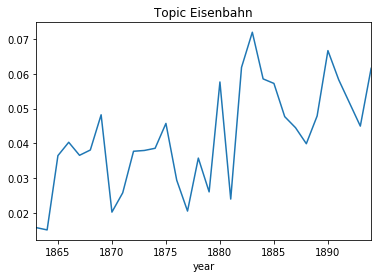

In [85]:
df_year_eisenbahn.plot(title='Topic Eisenbahn')

In [34]:
df_year_kirche = df_year.iloc[:,21]

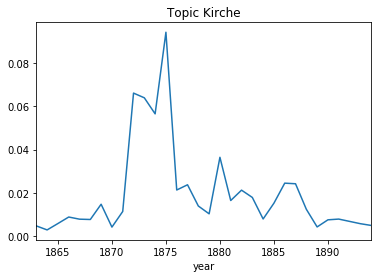

In [86]:
df_year_kirche.plot(title='Topic Kirche')

### Plots in einer Figure

[(1863, 1894),
 Text(0.5, 1.0, 'Durchschnitt der Topics Eisenbahn und Kirche nach Jahren')]

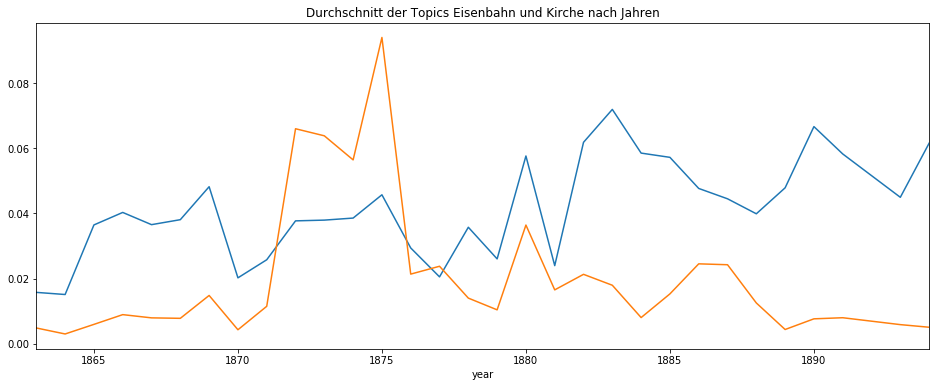

In [76]:
fig, ax = plt.subplots(figsize=(16,6))

df_year_eisenbahn.plot(ax=ax)
df_year_kirche.plot(ax=ax)

ax.set(title='Durchschnitt der Topics Eisenbahn und Kirche nach Jahren',
              xlim=[1863,1894])

### Plots mehrerer Topics

In [52]:
df_year_cat = df_year.iloc[:, [5, 10, 15]]

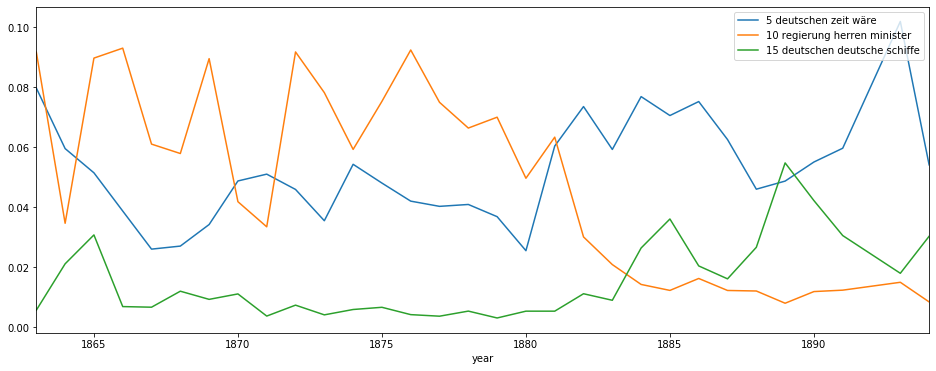

In [77]:
df_year_cat.plot(figsize=(16,6))

### Visualisierung nach Monaten

In [5]:
df_year_month = df.groupby(df.loc[:, 'year_month']).mean()

In [6]:
df_year_month_topics = df_year_month.iloc[:, [22, 15, 28]]

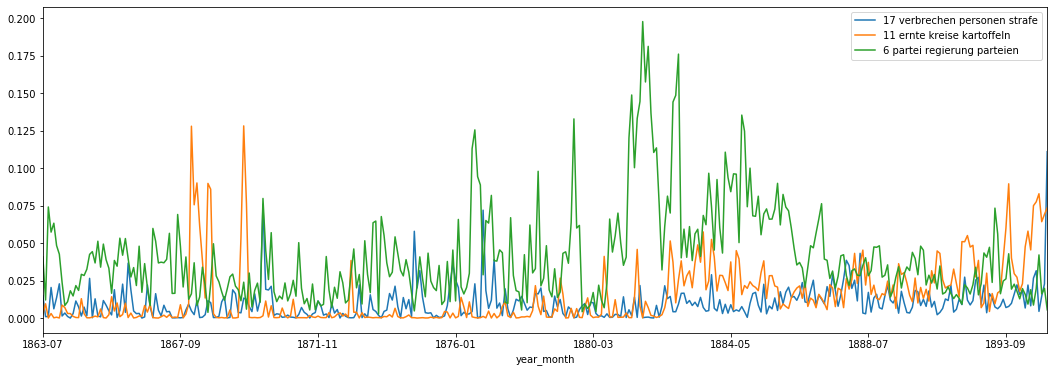

In [7]:
df_year_month_topics.plot(figsize=(18,6))